Imports

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

Load data

In [49]:
# Load the data
df = pd.read_csv('RHODFF_for_plotting.csv')

df = df[df['Condition'].str.contains('TIC|GC|TRPL')]

Plot data

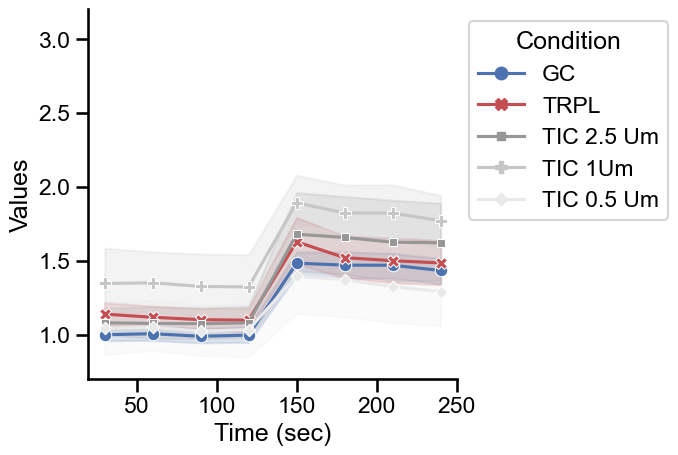

In [50]:
# Set the seaborn style to "talk" and font to "Arial"
sns.set_context("talk")
rcParams['font.family'] = 'Arial'

# Get unique conditions from the dataframe
unique_conditions = df['Condition'].unique()

# Color palette as dictionary
palette = {
    'GC':'#4C72B0', # blue
    'TRPL':'#C44E52', # red
}

# Create a list of grey colors
grey_colors = sns.color_palette("Greys_r", len(unique_conditions))

# Assign a grey color to all other conditions
for i, condition in enumerate(unique_conditions):
    if condition not in palette:
        palette[condition] = grey_colors[i]

ax = sns.lineplot(data=df, x="Time (sec)", y="Values", hue="Condition", style="Condition",
    markers=True, dashes=False, palette=palette)

# Plot appearance details
ax.set_ylim(0.7, 3.2)
ax.set_box_aspect(1)
sns.despine()
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# Save plot as PDF
plt.savefig('RodFF' + '.pdf', bbox_inches='tight')

plt.show()
